# <center> Deep learning for text with Fast.ai v2

### Installation
```
sudo pip install -U fastai2
```

### Reference notebook
https://github.com/fastai/fastai2/blob/master/nbs/course/lesson3-imdb.ipynb

In [1]:
from fastai2.text.all import *

# Read data

In [ ]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./data "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/4. NLP/data/movieReviews_trainLabel.tsv"

In [2]:
df = pd.read_csv("data/movieReviews_trainLabel.tsv", sep="\t", index_col="id")
df.rename(columns={"review": "text", "sentiment": "label"}, inplace=True)

# Only top 1000
df = df.sample(1000, random_state=0)

df.head()

,label,text
id,,
11311_4,0,"I vaguely remember Ben from my Sci-Fi fandom days of the '60s, I was doing several interviews & bios of obscure actors/actresses, most notably Ben, actress Fay Spain, and Jody Fair, who played Angela in 1961's The Young Savages. Ben was one of the people at a low-key Sci-Fi con in Chicago, about 1970, when I had a nice chat with him and his \career\"" and life. All these were published in some now-long-forgotten fanzine of the day. Wish I still had copies of those interviews, but time marches on, and any of those people surely wouldn't' remember me at all so many years later. Ben was a real..."
10118_7,1,"I really like Miikes movies about Yakuza, this one I saw about 2 years ago and it really fu**ed my head. Never before seen such a sick and twisted thing. The Story is good and the actors do their thing very well. I haven't seen the UK or Japan version, but I have to say that I believe that the German DVD is a bit censored. If you haven't seen the movie already and live in Germany maybe you better look out for a DVD from the Nederlands or Austria. The I-ON DVD contains a lot of very hard and nasty scenes, but at the showdown I felt that something was missing, about one or two very short sce..."
6764_4,0,"NATURAL BORN KILLERS (1994)<br /><br />Cinema Cut: R <br /><br />Director's Cut: NC-17<br /><br />It's an unusual Oliver Stone picture, but when I read he was on drugs during the filming, I needed no further explanation. 'Natural Born Killers' is a risky, mad, all out film-making that we do not get very often; strange, psychotic, artistic pictures.<br /><br />'Natural Born Killers' is basically the story of how two mass killers were popularised and glorified by the media; there is a great scene where an interviewer questions some teenagers about Mickey and Mallory, and the teenager says 'M..."
9728_3,0,"Tobe Hooper has made great movies so I was certain this couldn't be BAD. I didn't read any reviews and tried to watch this unintentionally humorous film. At times this made me laugh, sometimes I almost fell asleep, sometimes made me almost CRY for Hooper.<br /><br />I rated this 3/10 because its 1990 \horror\""-movie and many interesting or funny things happened there. Throughout the movie I was thinking something like \""they simply CAN'T add more things in this movie...\"" .. but they did.<br /><br />Some tell this is some sort of Firestarter clone but truly isn't. It's based on that idea b..."
3052_1,0,"This Santa movie starts off strange and I think Santa might be a pedo. Instead of the usual elf toy makers, this Santa has apparently kidnapped kids from all across the globe and makes them sing a bit like characters from \It's a Small World\""! I guess there are no child labor laws on the weird astral plane on which he lives (it's apparently NOT the North Pole and not on Earth)!! None of these kids seem very happy and I kept wanting to see commandos break in and rescue the tykes, though I guess for some of the third world kids, these working conditions were perhaps an improvement over loca..."


In [3]:
len(df)

1000

In [4]:
df['text'][0]

'I vaguely remember Ben from my Sci-Fi fandom days of the \'60s, I was doing several interviews & bios of obscure actors/actresses, most notably Ben, actress Fay Spain, and Jody Fair, who played Angela in 1961\'s The Young Savages. Ben was one of the people at a low-key Sci-Fi con in Chicago, about 1970, when I had a nice chat with him and his \\career\\" and life. All these were published in some now-long-forgotten fanzine of the day. Wish I still had copies of those interviews, but time marches on, and any of those people surely wouldn\'t\' remember me at all so many years later. Ben was a really nice fellow, ekeing out a living (The cons of those days didn\'t even pay their guest, unless, of course they were big-name stars, and even then the pay was a couple hundred dollars, at most! Good to know Ben\'s still alive & kicking! How \'bout a remake of Creature, but 50 years older! Ugly then, uglier now!"'

# Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols:

- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

# Numericalization
Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token UNK.

This is done automatically behind the scenes if we use a facotry method of TextDataLoaders.



In [5]:
dbunch_lm = TextDataLoaders.from_df(df, text_col='text', label_col='label', is_lm=True)

And if we look at what a what's in our datasets, we'll see the numericalized text as a representation:

In [6]:
dbunch_lm.train_ds[0]

(TensorText([   2,    8, 5953,    8,  268,    8, 1203,   18,    8,   87,    8,  272,
            8, 3506,  353,  176,   44,   14,    9,  136,  368,  135,   46,   47,
          300,   11,    8,   38,   16,  550,   27,    8,    0,    8, 4025,   10,
           13,  156,   49,   61,    0,    0,   10,   49,  116, 1275,   15,  892,
           12, 1927,   28,   40,  272, 3506,   11,   13,   96, 2710,    8,  918,
           29,  107,   12,    8, 2403,    8,    0,   49,  309,   40, 1119,  487,
           11,    8,    0,    0,   16, 1247,   27,    9, 1408,    8,    0,    8,
         4025,   12,    8, 1311,    0,   16,   98,   27,    9,  316,   11,    8,
          273,  160,   29,    9, 1576,  368,   11]),)

In [7]:
dbunch_lm.vocab[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i']

In [8]:
dbunch_lm.show_batch()

,text,text_
0,"xxbos xxmaj i 've always thought that most huge box - office xxunk usually have something to recommend them , but after the remake of xxmaj around the xxmaj world in 80 xxmaj days and xxmaj xxunk , xxmaj i 'm beginning to doubt it . xxmaj for those not familiar , it 's based on a xxunk show about a family of astronauts who use state of the art xxunk ,","xxmaj i 've always thought that most huge box - office xxunk usually have something to recommend them , but after the remake of xxmaj around the xxmaj world in 80 xxmaj days and xxmaj xxunk , xxmaj i 'm beginning to doubt it . xxmaj for those not familiar , it 's based on a xxunk show about a family of astronauts who use state of the art xxunk , xxunk"
1,"xxunk , mafia score - xxunk and xxmaj world xxmaj war xxup ii battles , xxmaj xxunk could be xxunk on to give us two solid hours of entertainment on xxmaj saturday night . xxmaj he worked with the cream of the male actors of his day : xxmaj xxunk , xxmaj xxunk , xxmaj xxunk , xxmaj delon , xxmaj xxunk , xxmaj anthony xxmaj quinn . i … xxunk xxmaj",", mafia score - xxunk and xxmaj world xxmaj war xxup ii battles , xxmaj xxunk could be xxunk on to give us two solid hours of entertainment on xxmaj saturday night . xxmaj he worked with the cream of the male actors of his day : xxmaj xxunk , xxmaj xxunk , xxmaj xxunk , xxmaj delon , xxmaj xxunk , xxmaj anthony xxmaj quinn . i … xxunk xxmaj xxunk"
2,"has got to be the xxup dumbest movie xxmaj i 've ever seen . xxmaj we watched it in english class … and this movie made xxup absolutely no sense . i would never , xxup ever watch this movie again … and my sympathy to those who have ever xxup paid to see it . xxbos xxmaj samuel xxmaj fuller is hardly one of xxmaj america 's great directors . xxmaj","got to be the xxup dumbest movie xxmaj i 've ever seen . xxmaj we watched it in english class … and this movie made xxup absolutely no sense . i would never , xxup ever watch this movie again … and my sympathy to those who have ever xxup paid to see it . xxbos xxmaj samuel xxmaj fuller is hardly one of xxmaj america 's great directors . xxmaj i"
3,"allowed to have his character slowly xxunk into despair -- someone has to , or the xxmaj xxunk would be too detached , and no one wants to see that . xxmaj except the monster that has at the time of this writing become the news - media . xxmaj they 'll always eat train xxunk up and feed the xxunk xxunk to the xxunk public . "" xxbos xxmaj this very","to have his character slowly xxunk into despair -- someone has to , or the xxmaj xxunk would be too detached , and no one wants to see that . xxmaj except the monster that has at the time of this writing become the news - media . xxmaj they 'll always eat train xxunk up and feed the xxunk xxunk to the xxunk public . "" xxbos xxmaj this very strange"
4,"of xxunk , only to be captured and xxunk by a couple of violent hillbillies , is surely the worst nightmare of xxunk % of the world 's population . xxmaj it would have been easy for xxmaj deliverance to slip into exploitation xxunk , but xxmaj john xxmaj xxunk has cleverly avoided the xxunk to go down such a route and has made a film that explores , questions and challenges","xxunk , only to be captured and xxunk by a couple of violent hillbillies , is surely the worst nightmare of xxunk % of the world 's population . xxmaj it would have been easy for xxmaj deliverance to slip into exploitation xxunk , but xxmaj john xxmaj xxunk has cleverly avoided the xxunk to go down such a route and has made a film that explores , questions and challenges the"
5,"- looking back - xxunk since "" on xxmaj her xxmaj xxunk 's xxmaj secret xxmaj service "" . ( * * ) "" xxbos xxmaj edward xxmaj xxunk 's xxmaj tattooed xxmaj stranger is supposed to play like a crime thriller with a little film noir mixed in for flavor . xxmaj instead , it 's a poorly acted , witless look into low budget and uninspired film making . xxmaj","looking back - xxunk since "" on xxm

## With the data block API
We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the various arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [9]:
imdb_lm = DataBlock(blocks=(TextBlock.from_df('text', is_lm=True),),
                    get_x=ColReader('text'),
                    splitter=RandomSplitter())

dbunch_lm = imdb_lm.dataloaders(df)

## Language model (Predict next word): [AWD LSTM](https://arxiv.org/pdf/1708.02182.pdf)


The reviews are in a training and test set following an imagenet structure. The only difference is that there is an unsup folder on top of train and test that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called wikitext-103). That model has been trained to guess what the next word is, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes the first minute you run it).

In [10]:
dbunch_lm.show_batch()

,text,text_
0,"xxbos xxmaj this movie was awful . i had a very difficult time watching this all the way through . i did n't get the point of the movie . xxmaj what was the point of this movie ? xxmaj the soundtrack was bad , acting was bad and the story xxunk . xxmaj the two main characters in the movie were very boring and their dialog was uninteresting . xxmaj there","xxmaj this movie was awful . i had a very difficult time watching this all the way through . i did n't get the point of the movie . xxmaj what was the point of this movie ? xxmaj the soundtrack was bad , acting was bad and the story xxunk . xxmaj the two main characters in the movie were very boring and their dialog was uninteresting . xxmaj there was"
1,"xxmaj patrick bring together the surviving members of the xxmaj bombshells . xxmaj we do n't know if enough of them can be found . xxmaj the xxunk more often than not turn into off - key shambles . xxmaj while they do this , we share xxmaj elizabeth 's flashbacks of what life was like when she and xxmaj patrick were young in war - time xxmaj london , playing in","patrick bring together the surviving members of the xxmaj bombshells . xxmaj we do n't know if enough of them can be found . xxmaj the xxunk more often than not turn into off - key shambles . xxmaj while they do this , we share xxmaj elizabeth 's flashbacks of what life was like when she and xxmaj patrick were young in war - time xxmaj london , playing in the"
2,"to what xxmaj i 've seen him do . xxmaj oh , and the father was n't half - bad to my memory , but he was in the movie for such a small amount of time i can hardly remember . \n\n xxmaj the story itself was not very good . xxmaj more xxunk than you can imagine . xxmaj predictable story ( until the ending , which i barely understood","what xxmaj i 've seen him do . xxmaj oh , and the father was n't half - bad to my memory , but he was in the movie for such a small amount of time i can hardly remember . \n\n xxmaj the story itself was not very good . xxmaj more xxunk than you can imagine . xxmaj predictable story ( until the ending , which i barely understood )"
3,"orson xxmaj welles : xxmaj the one - man xxmaj band ( 1995 ) ) , where he seems to be just reading to the camera and believing that he 's xxunk , xxunk dramatic . xxmaj i 'm also someone who almost never xxunk about accents , but somehow xxmaj welles manages to make his xxmaj irish accent sound affected and pretentious to me , too . \n\n xxmaj as for","xxmaj welles : xxmaj the one - man xxmaj band ( 1995 ) ) , where he seems to be just reading to the camera and believing that he 's xxunk , xxunk dramatic . xxmaj i 'm also someone who almost never xxunk about accents , but somehow xxmaj welles manages to make his xxmaj irish accent sound affected and pretentious to me , too . \n\n xxmaj as for the"
4,"and never came back even once as a guest ) and xxmaj hoss had died and xxmaj little xxmaj joe had left after his wife ( in the series ) had been killed by xxunk . \n\n xxmaj overall , the era from 1959 - 1965 is the best of this series . xxmaj once xxmaj adam left , it slowly declined . xxmaj most of the shows before 1970 are pretty","never came back even once as a guest ) and xxmaj hoss had died and xxmaj little xxmaj joe had left after his wife ( in the series ) had been killed by xxunk . \n\n xxmaj overall , the era from 1959 - 1965 is the best of this series . xxmaj once xxmaj adam left , it slowly declined . xxmaj most of the shows before 1970 are pretty good"
5,"- and xxup fun - way possible . \n\n xxmaj so yes , this movie is n't an \ epic , life - affirming xxunk / 11 picture with obligatory social commentary "" effort . xxmaj the pacing is uneven , some of the scenes could have been cut and not all the actors tow the line . xxmaj but car movies rarely come better than this . xxmaj so if you","and xxup fun - way possible . \n\n xxmaj so yes , this movie is n't an \ epic , life - affirming xxunk / 11 picture with obligatory social 

In [11]:
len(dbunch_lm.vocab)

6760

### Langauge model: Train only head

In [12]:
learn = language_model_learner(dbunch_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()])#.to_fp16()

(0.012022644281387329, 0.010964781977236271)

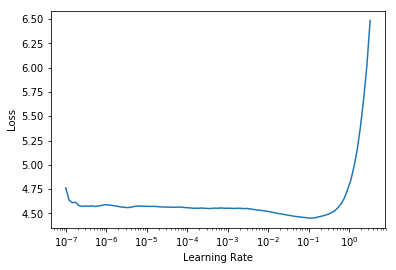

In [13]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7,0.8))

KeyboardInterrupt: 

In [ ]:
learn.save('fit_head')

### Langauge model: Unfreeze and train all layers

In [ ]:
learn.load('fit_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 2e-3, moms=(0.8,0.7,0.8))